# Advance House Price Prediction

In [28]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_palette('husl')

warnings.filterwarnings('ignore')



In [29]:
original_data = pd.read_csv('/Users/kavach/Downloads/train-2.csv')
pd.pandas.set_option('display.max_columns', None)

df = original_data.copy()

In [30]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Having a OverAll look at the DataSet

In [31]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

((1460, 81), None)

### Checking for Missing Values

In [32]:

missing_values = [features for features in df.columns if df[features].isnull().sum()>1]

for features in missing_values:

    print(features, np.round(df[features].isnull().mean(), 4), '% of Missing Values')
    print()

LotFrontage 0.1774 % of Missing Values

Alley 0.9377 % of Missing Values

MasVnrType 0.0055 % of Missing Values

MasVnrArea 0.0055 % of Missing Values

BsmtQual 0.0253 % of Missing Values

BsmtCond 0.0253 % of Missing Values

BsmtExposure 0.026 % of Missing Values

BsmtFinType1 0.0253 % of Missing Values

BsmtFinType2 0.026 % of Missing Values

FireplaceQu 0.4726 % of Missing Values

GarageType 0.0555 % of Missing Values

GarageYrBlt 0.0555 % of Missing Values

GarageFinish 0.0555 % of Missing Values

GarageQual 0.0555 % of Missing Values

GarageCond 0.0555 % of Missing Values

PoolQC 0.9952 % of Missing Values

Fence 0.8075 % of Missing Values

MiscFeature 0.963 % of Missing Values



In [33]:
df[missing_values].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    1452 non-null   object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   FireplaceQu   770 non-null    object 
 10  GarageType    1379 non-null   object 
 11  GarageYrBlt   1379 non-null   float64
 12  GarageFinish  1379 non-null   object 
 13  GarageQual    1379 non-null   object 
 14  GarageCond    1379 non-null   object 
 15  PoolQC        7 non-null      object 
 16  Fence         281 non-null    object 
 17  MiscFeature   54 non-null     object 
dtypes: float64(3), object(15)
me

In [34]:
len(missing_values), missing_values


(18,
 ['LotFrontage',
  'Alley',
  'MasVnrType',
  'MasVnrArea',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'FireplaceQu',
  'GarageType',
  'GarageYrBlt',
  'GarageFinish',
  'GarageQual',
  'GarageCond',
  'PoolQC',
  'Fence',
  'MiscFeature'])

<AxesSubplot:>

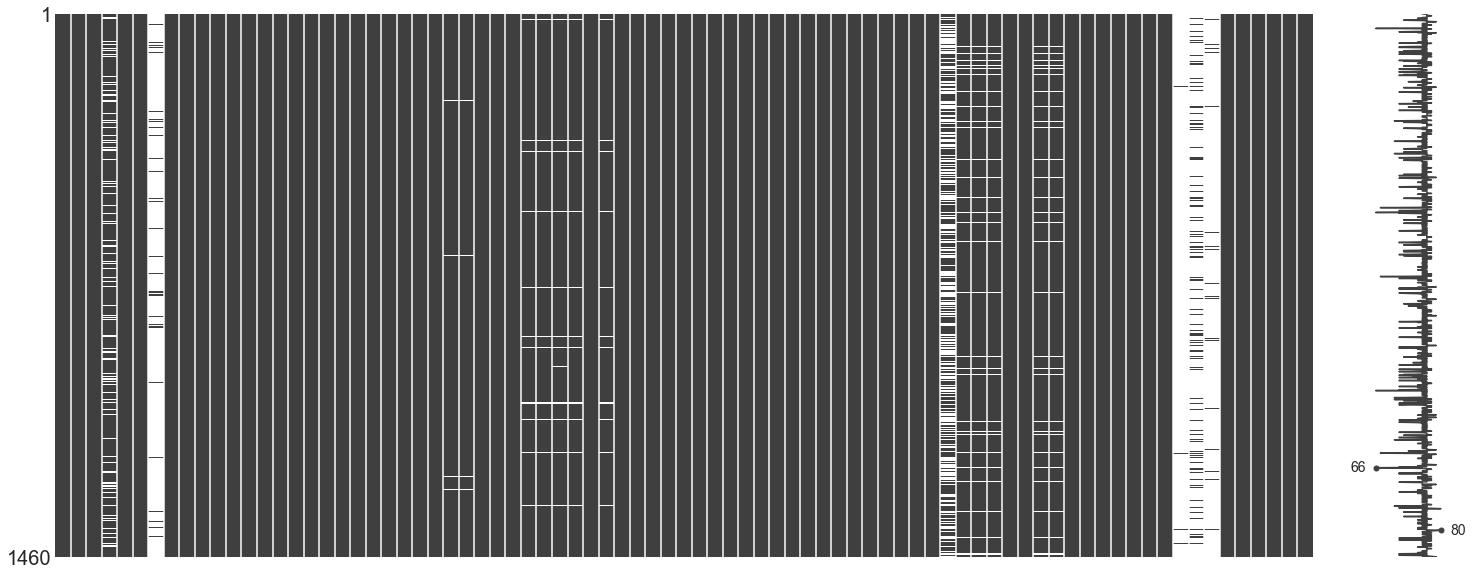

In [35]:
import missingno as msno
msno.matrix(df)

### Since there are many Missing Values, I will find the relationship between the Missing Values and Sales Price

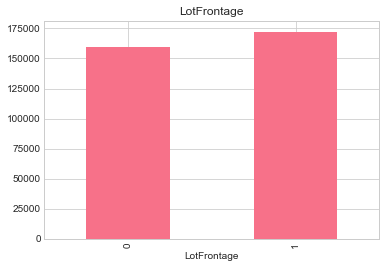

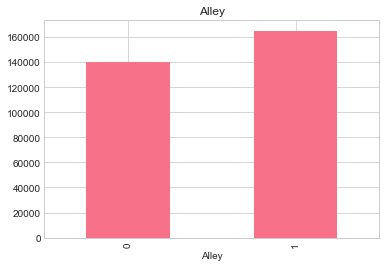

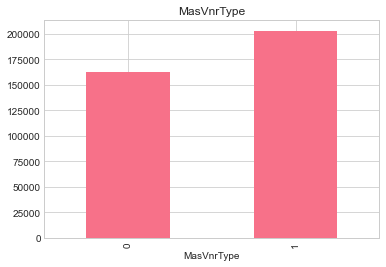

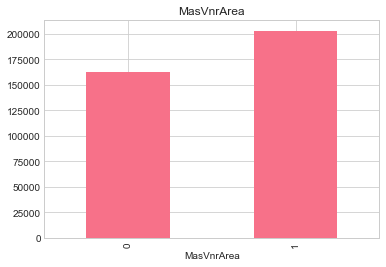

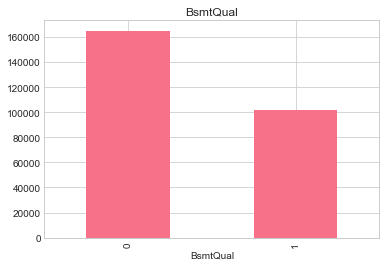

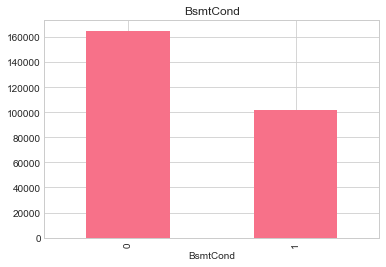

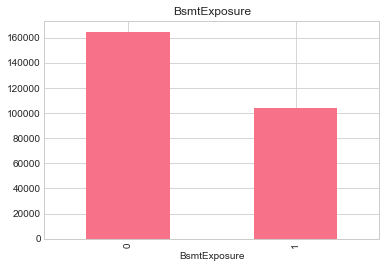

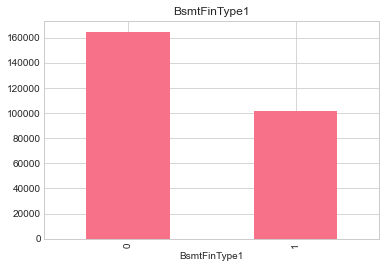

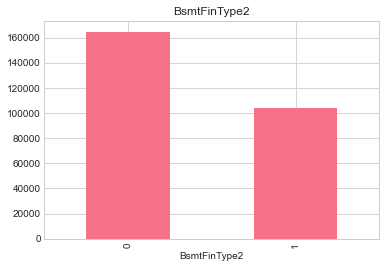

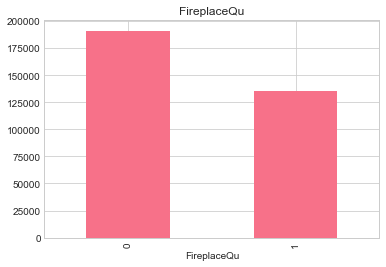

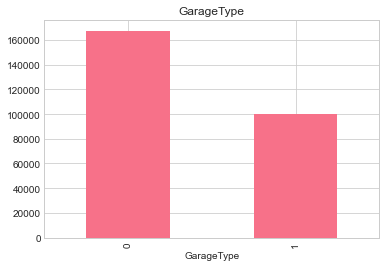

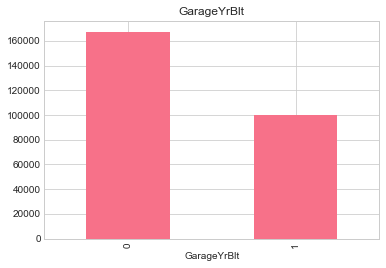

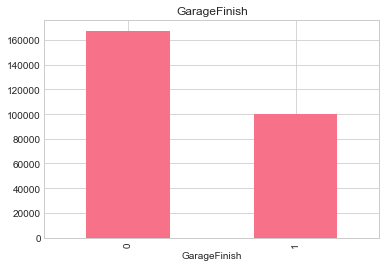

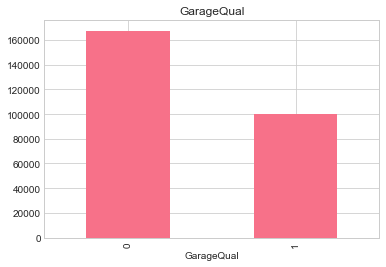

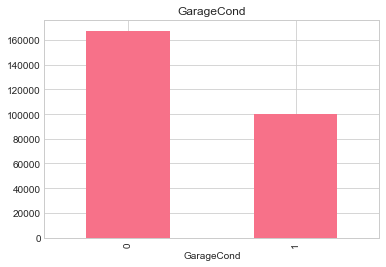

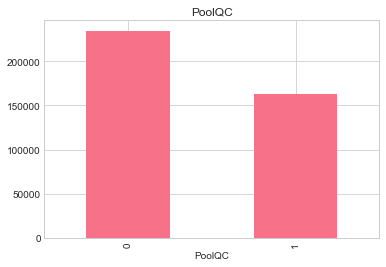

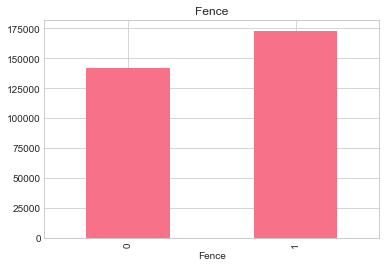

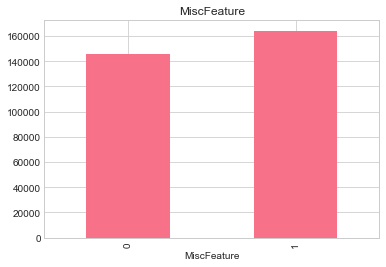

In [36]:
for feature in missing_values:
    data = df.copy()

    # Let's make a variable that indicates 1 if the observation was missing or 0 otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)

    # Let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()


### Here, the relation between the **Missing Values** and the **SalesPrice** is clearly visible.<br /> Hence we need to replace these values with something meaningful which we will do in the **Feature Engineering Section**

### Column ID is of no use. Therefore, dropping that Column

In [37]:
df.drop(['Id'], axis=1, inplace=True)

## Numerical Variables

In [38]:
# List of Numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables :- ', len(numerical_features))
print()


# All the Numerical Variables
df[numerical_features].head()


Number of numerical variables :-  37



,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [39]:
# Let's select features where the correlation with 'SalePrice' is higher than |0.3|
# -1 because the latest row is SalePrice
df_num_corr = df[numerical_features].corr()["SalePrice"][:-1]

# Correlated features (r2 > 0.5)
high_features_list = df_num_corr[abs(df_num_corr) >= 0.5].sort_values(ascending=False)
print(
    f"{len(high_features_list)} strongly correlated values with SalePrice:\n{high_features_list}\n")

# Correlated features (0.3 < r2 < 0.5)
low_features_list = df_num_corr[(abs(df_num_corr) < 0.5) & (abs(df_num_corr) >= 0.3)].sort_values(ascending=False)
print(
    f"{len(low_features_list)} slightly correlated values with SalePrice:\n{low_features_list}")


10 strongly correlated values with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

8 slightly correlated values with SalePrice:
GarageYrBlt    0.486362
MasVnrArea     0.477493
Fireplaces     0.466929
BsmtFinSF1     0.386420
LotFrontage    0.351799
WoodDeckSF     0.324413
2ndFlrSF       0.319334
OpenPorchSF    0.315856
Name: SalePrice, dtype: float64


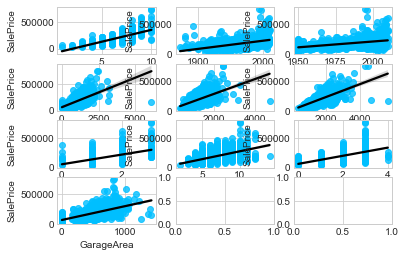

In [40]:
from matplotlib import pyplot as plt
# Features with high correlation (higher than 0.5)
strong_features = df_num_corr[abs(df_num_corr) >= 0.5].index.tolist()
strong_features.append("SalePrice")

df_strong_features = df[numerical_features].loc[:, strong_features]

plt.style.use("seaborn-whitegrid")  # define figures style
fig, ax = plt.subplots(round(len(strong_features) / 3), 3)


for i, ax in enumerate(fig.axes):
    # plot the correlation of each feature with SalePrice
    if i < len(strong_features)-1:
        sns.regplot(x=strong_features[i], y="SalePrice", data=df_strong_features, ax=ax, scatter_kws={
                    "color": "deepskyblue"}, line_kws={"color": "black"})
        
                





## Categorical Variables

In [41]:
# List of Categorical Variables
categorical_feature = [feature for feature in df.columns if df[feature].dtypes == 'O']

print('Number of Categorical Variables :- ', len(categorical_feature))
print()

# All the Categorical Variables
df[categorical_feature].head()


Number of Categorical Variables :-  43



,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


## Storing All the types of Year in One List

In [42]:
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature ]

df[year_feature].head()


,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


#### Checking whether there is a relation between the Year the house is sold and the Sales Price

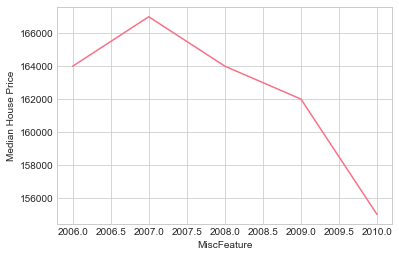

In [43]:

df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel(feature)
plt.ylabel('Median House Price')
plt.show()


### This is interesting, as the time passes the **Price** of the house starts to degrade, which is  quite opposite in India because as the time passes the Price of the Houses starts increasing

### Checking with all the Year Feature with the Sales Price

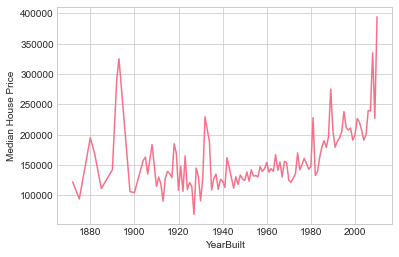

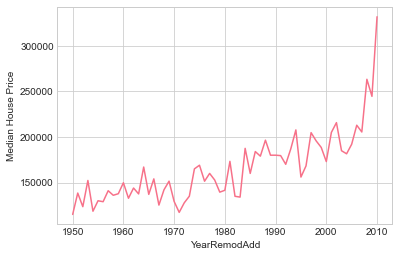

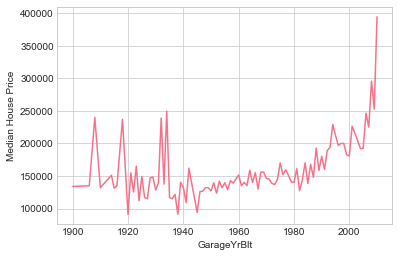

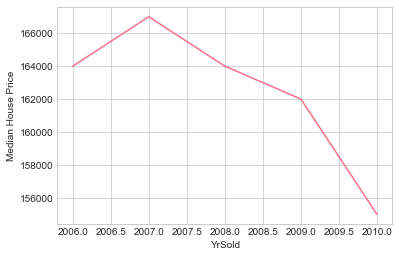

In [44]:
for feature in year_feature:

    df.groupby(feature)['SalePrice'].median().plot()
    plt.xlabel(feature)
    plt.ylabel('Median House Price')

    plt.show()


### We can Clearly see that all the new Constructions are of high Price as compared to the old Houses, whoose price is degrading as the time passes

## Since Numerical Variables is of 2 types 
1. **Continoius** - It does not have any fixed values, it keeps on changing. <br />***Example*** - Age of human beings, it never is still it is always changing.
2. **Discrete** - It has a fixed Values. <br /> ***Example*** :- Tossing a coin for a Head or Tail. The outcome is fixed it can either be head or tail but nothing other than that.

3. To understand in more in depth the difference between Continouis and Discerete refer this link :- https://www.youtube.com/watch?v=cz4nPSA9rlc



#### Discrete Variable

In [45]:
discrete_feature = [feature for feature in numerical_features if len(df[feature].unique()) < 25 and feature not in year_feature+['Id']]

print('Discrete Variables  Count :- ',len(discrete_feature))

Discrete Variables  Count :-  17


In [46]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

### Finding the relationship between Discrete Numerical Variables and Sales Price

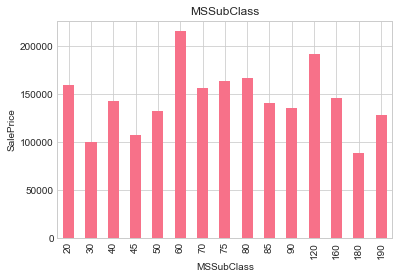

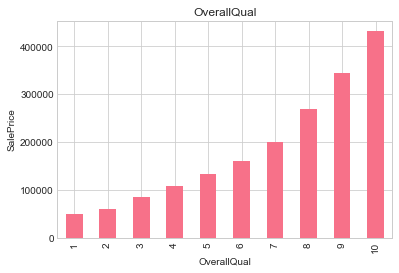

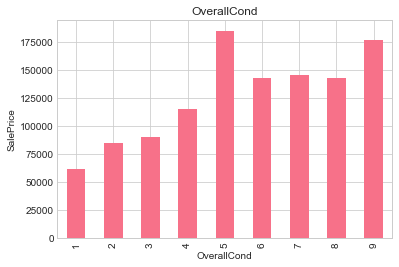

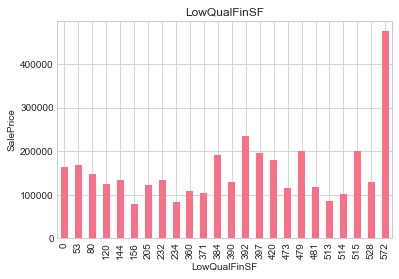

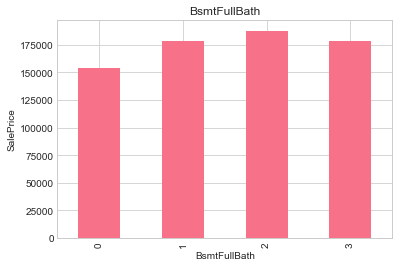

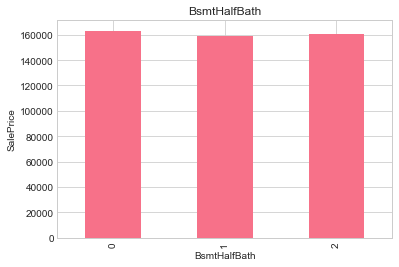

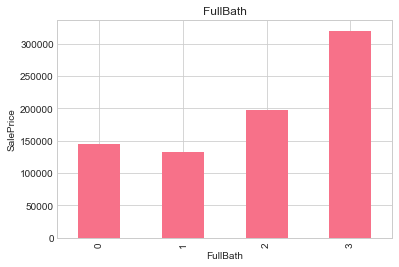

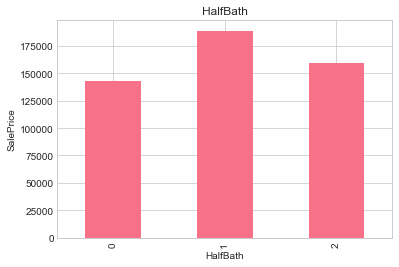

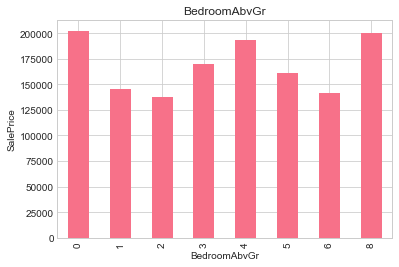

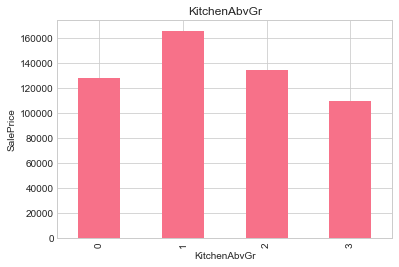

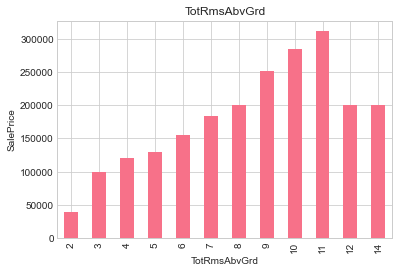

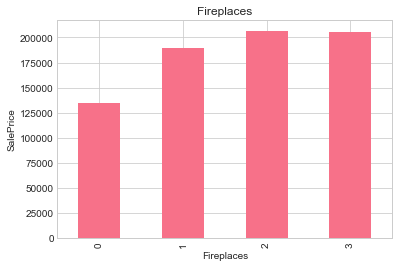

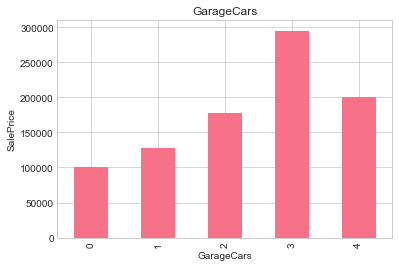

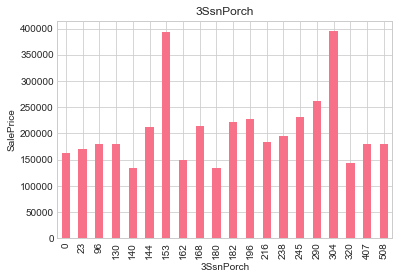

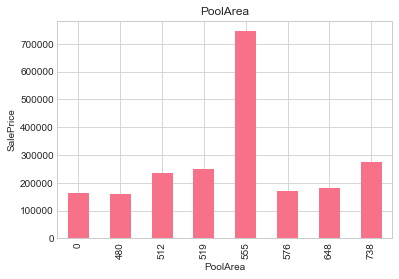

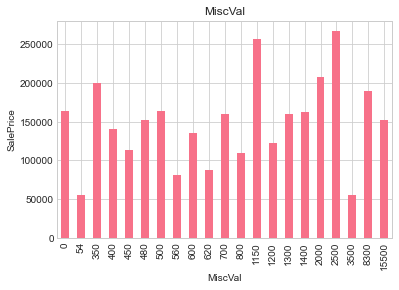

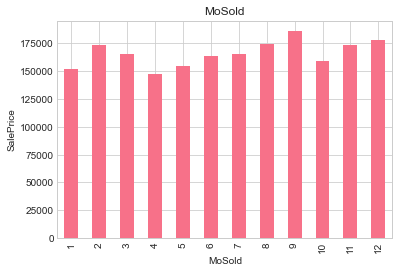

In [47]:
for feature in discrete_feature:
    data = df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()


 1. This is a great insight some of the Features such as **OverAllQual** is linerly escalating along with the price
 2. GarageCar increased till 3 but then suddenly prices dropped when it was 4, I guess it is because very few people own 4 cars.
 3. PoolArea with 555 has very high price among the rest which is strange , even some of them which has a greater area of pool size than this has less price 


## Continous Variable

In [48]:
continous_featre = [feature for feature in numerical_features if feature not in discrete_feature + year_feature]

print('Number of Continous Feature', len(continous_featre))

Number of Continous Feature 16


In [49]:
df[continous_featre].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


### Finding the Relationship Between Continous Variable and SalePrice

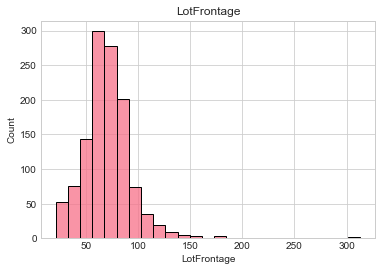

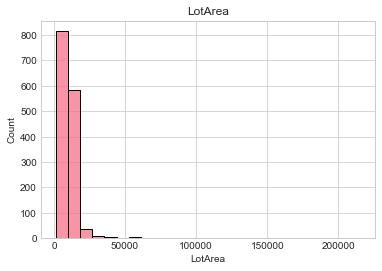

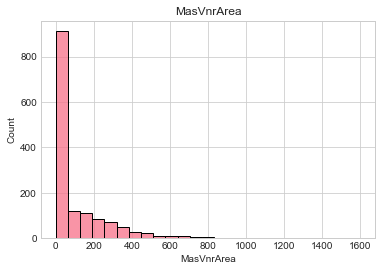

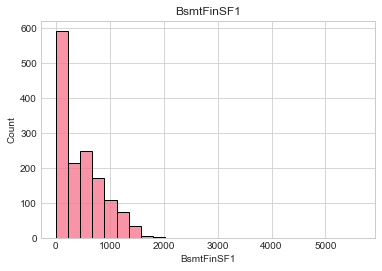

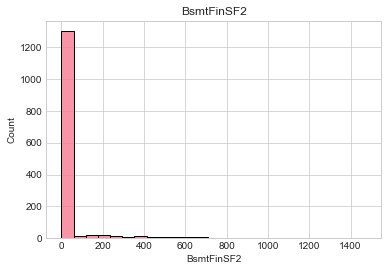

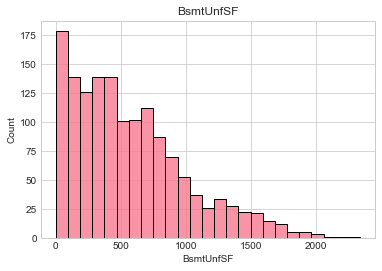

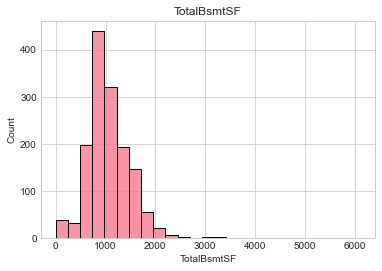

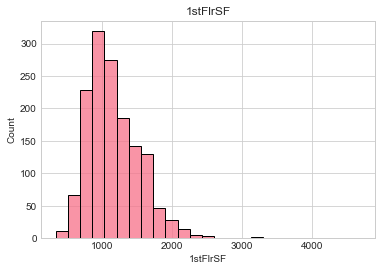

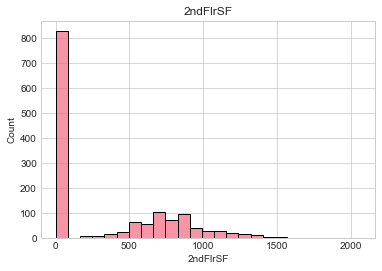

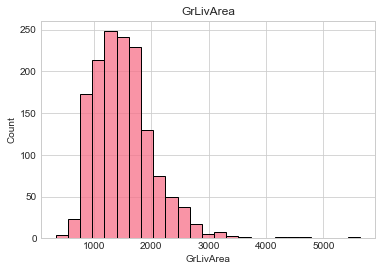

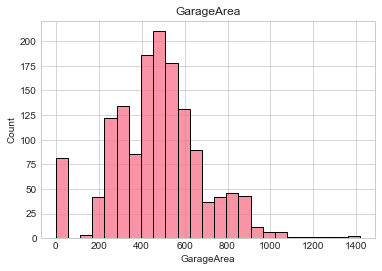

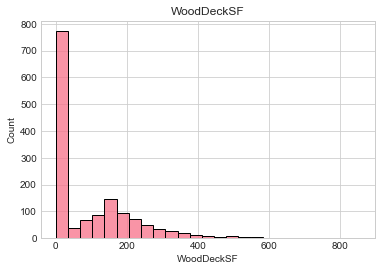

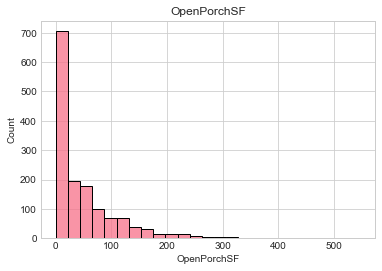

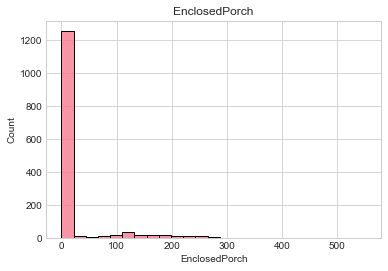

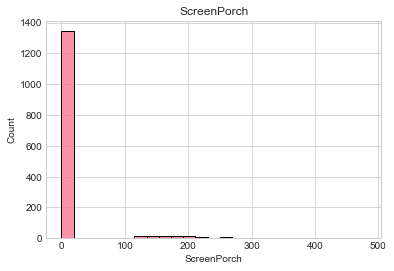

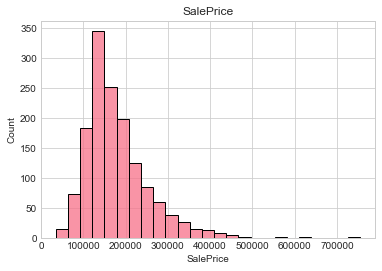

In [50]:
for feature in continous_featre:
    

    sns.histplot(x=feature, data=df, bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

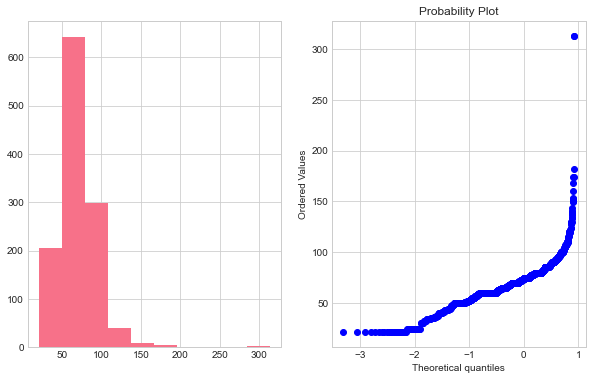

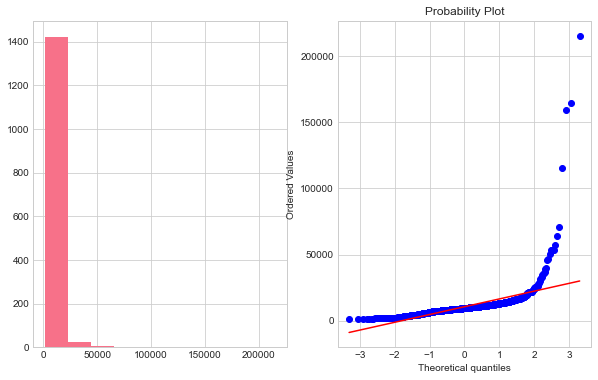

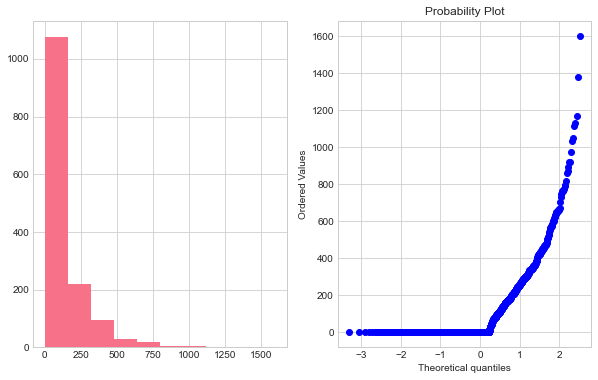

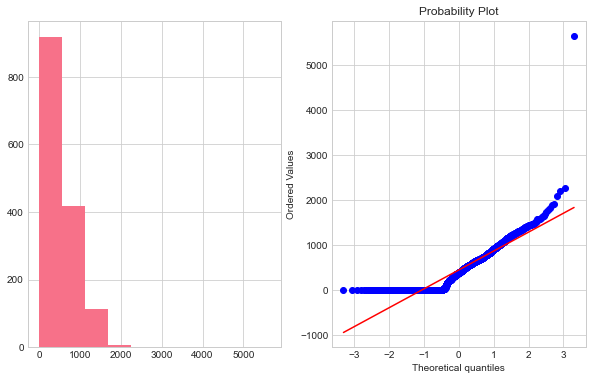

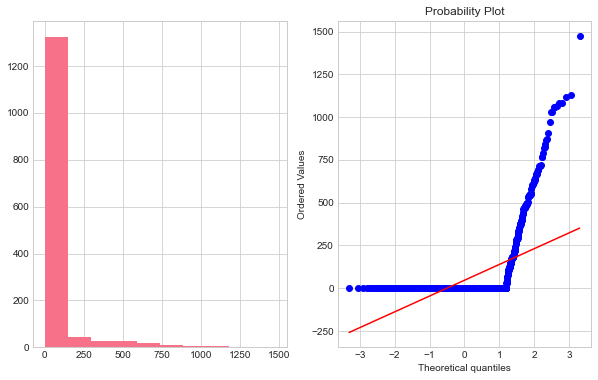

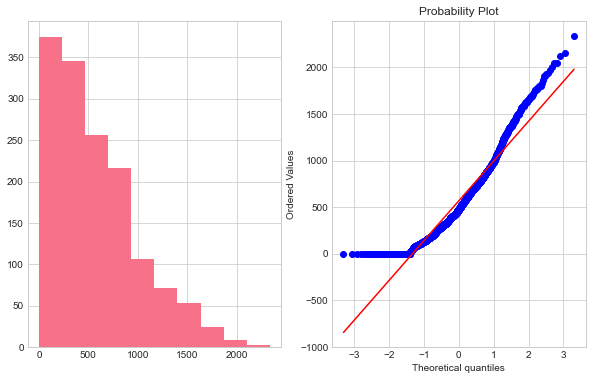

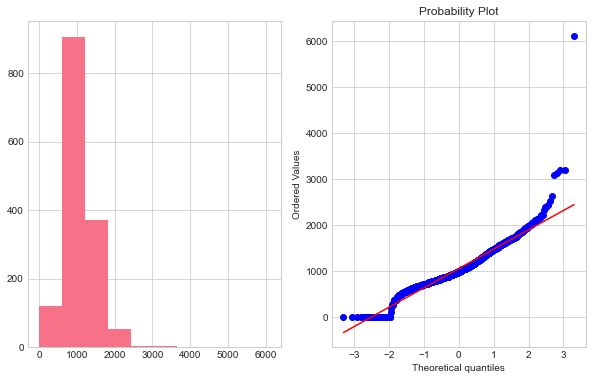

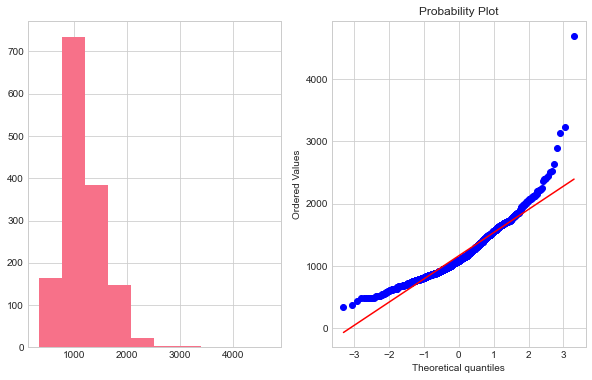

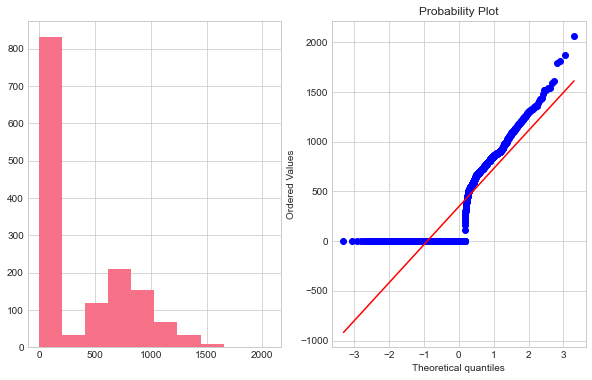

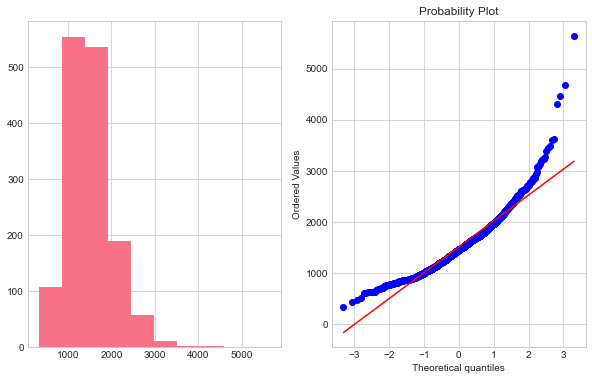

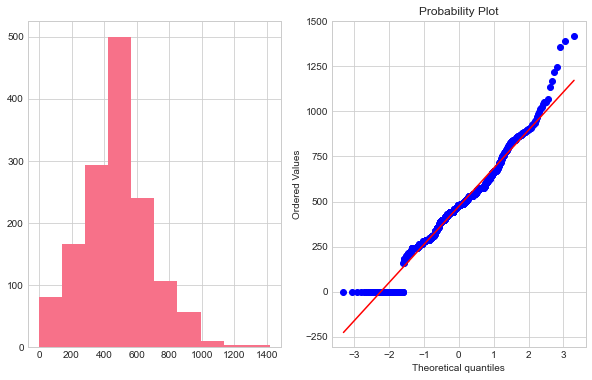

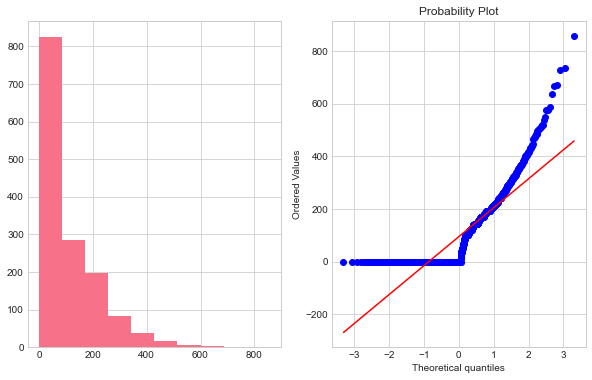

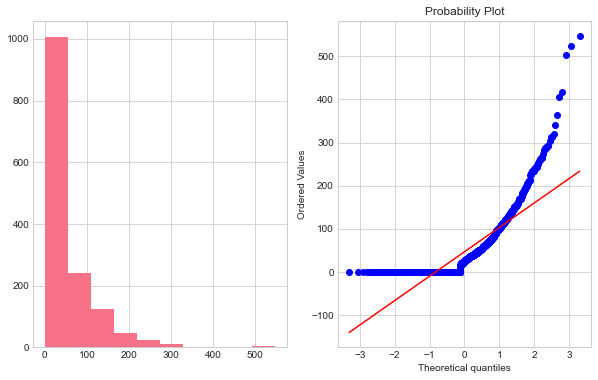

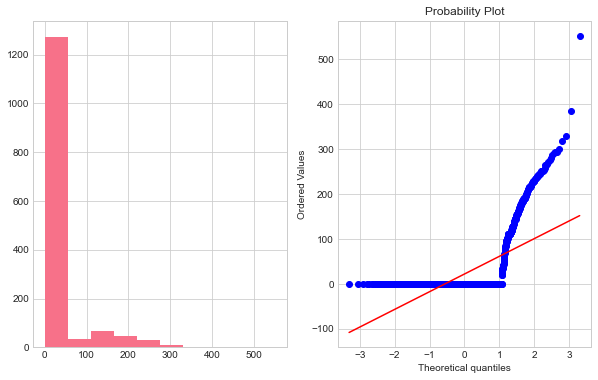

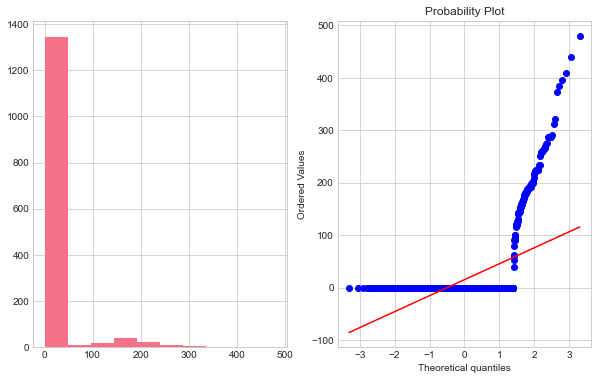

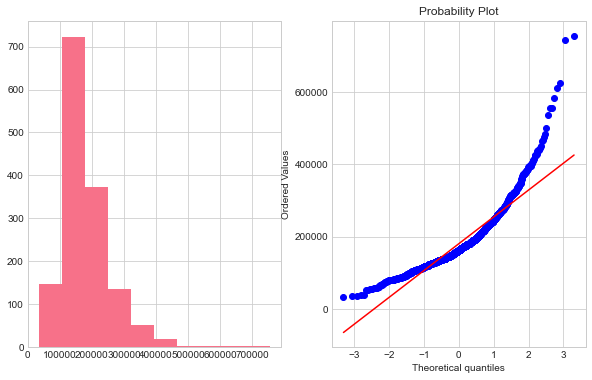

In [51]:
import scipy.stats as stat
import pylab
import numpy as np


def plot_data(df, feature):
    # This is for the left graph
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)

    # This is for the right graph if it's majority of the data is following in the red line, then it is gausian transformation otherwise not
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist='norm', plot=pylab)
    plt.show()

for feature in continous_featre:
    plot_data(df, feature)
    


LotFrontage


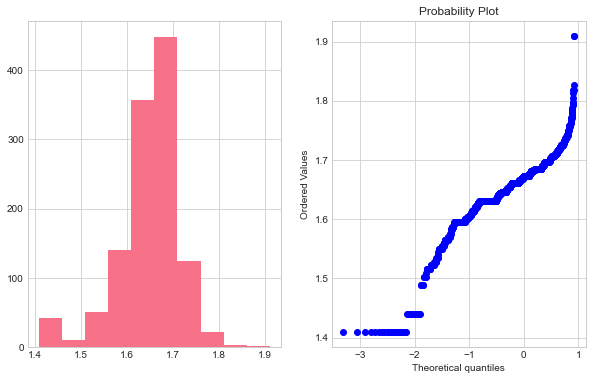

LotArea


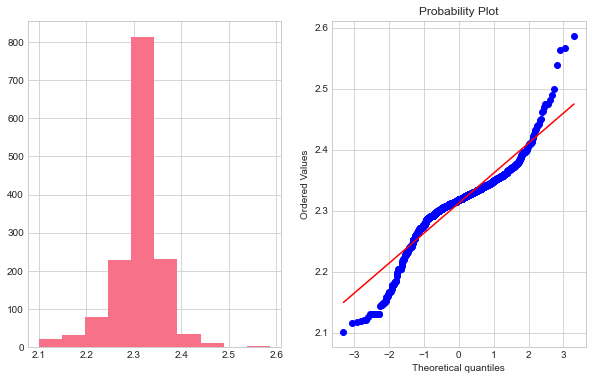

MasVnrArea


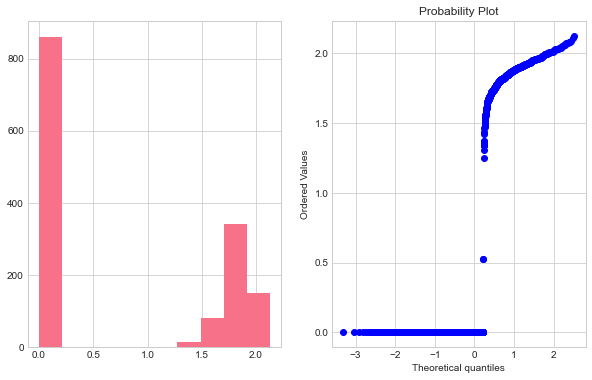

BsmtFinSF1


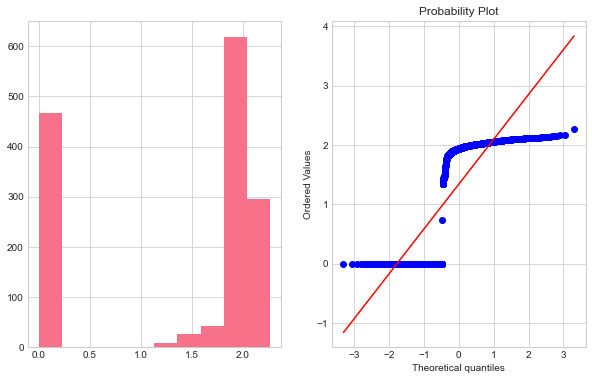

BsmtFinSF2


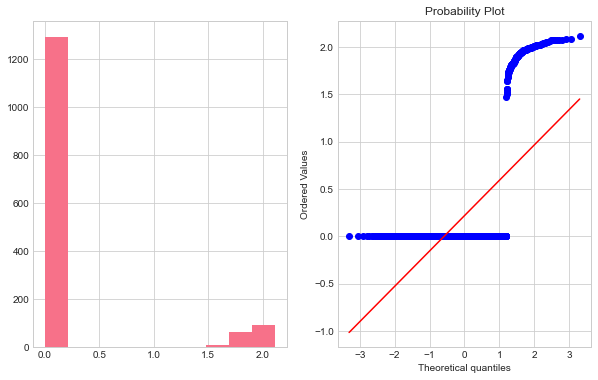

BsmtUnfSF


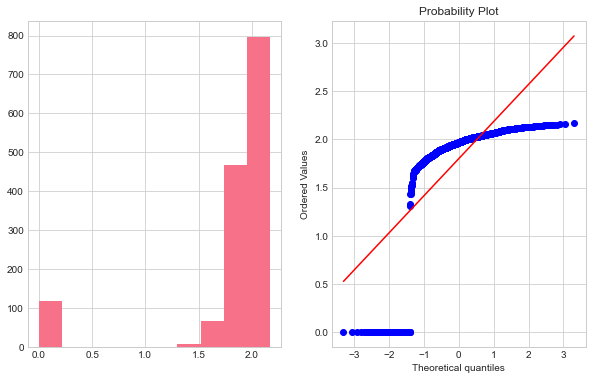

TotalBsmtSF


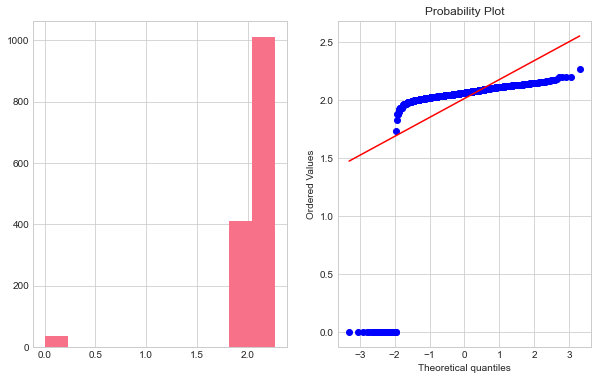

1stFlrSF


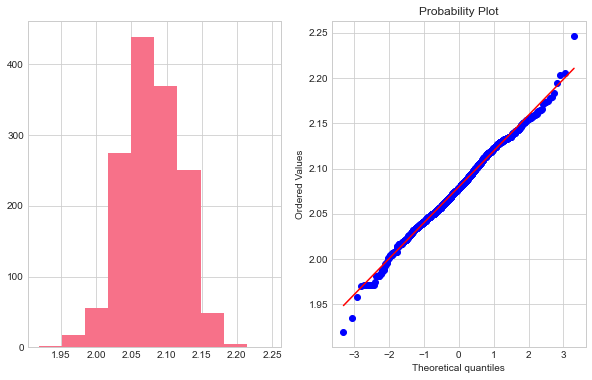

2ndFlrSF


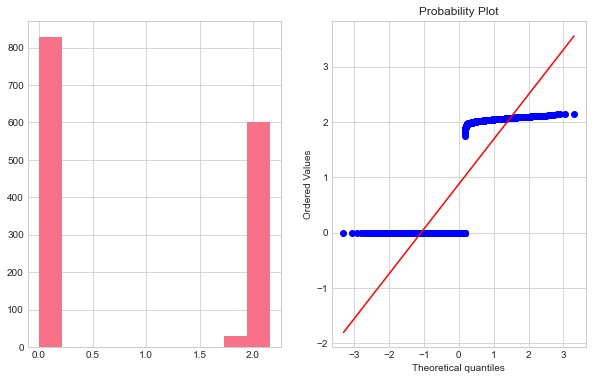

GrLivArea


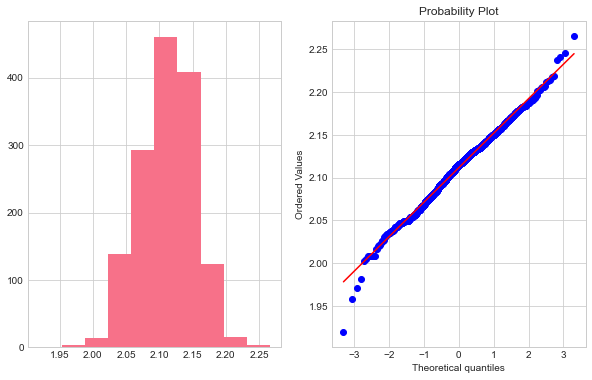

GarageArea


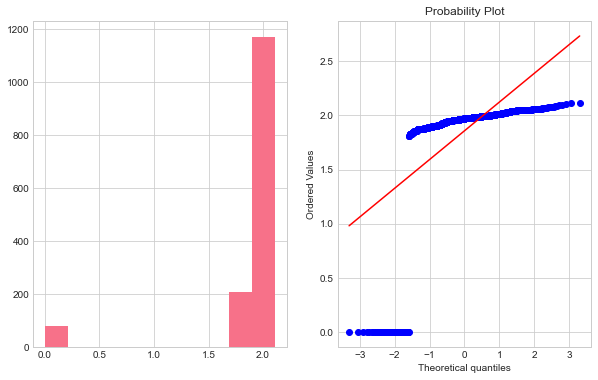

WoodDeckSF


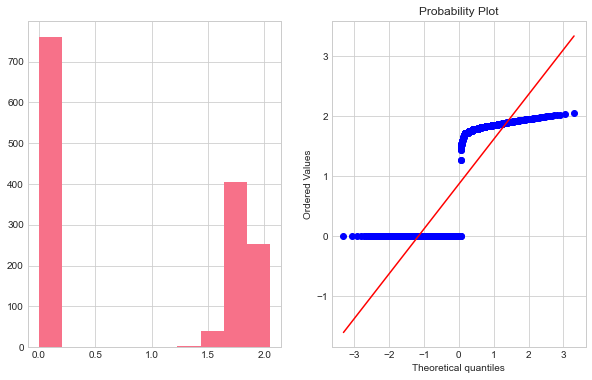

OpenPorchSF


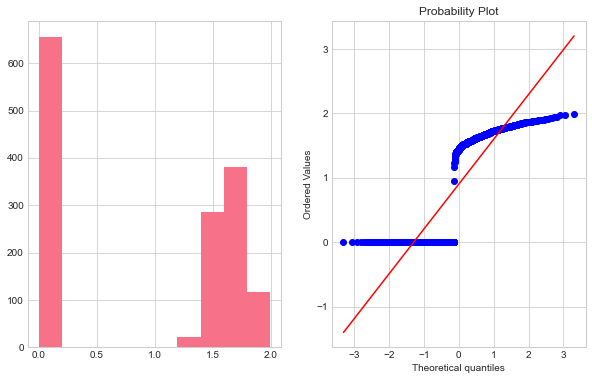

EnclosedPorch


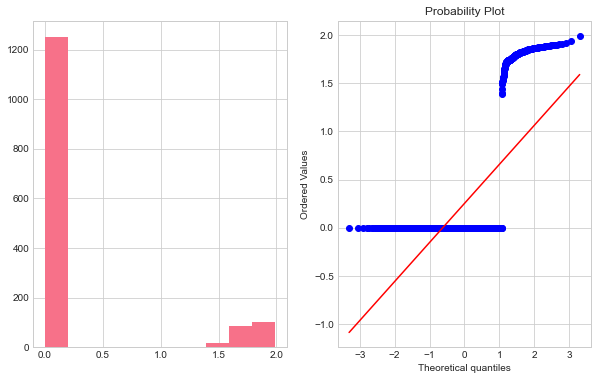

ScreenPorch


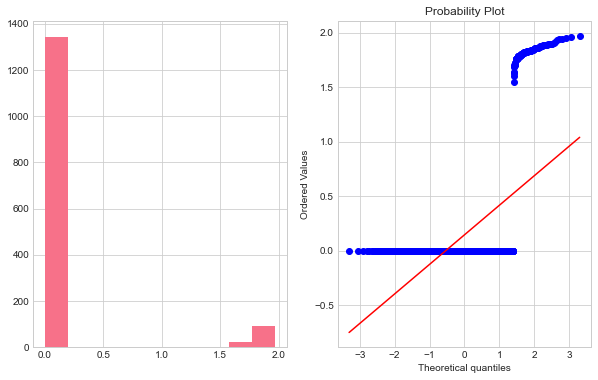

SalePrice


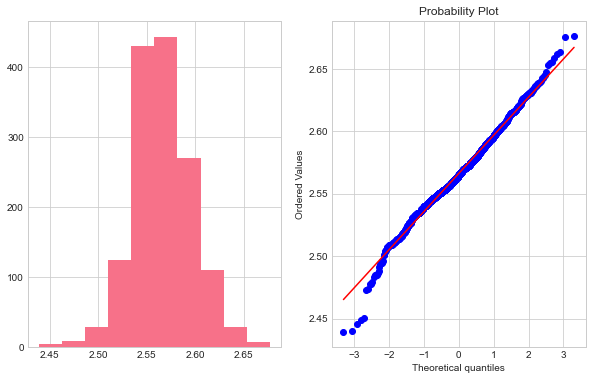

In [53]:
for feature in continous_featre:
    print(feature)
    df[feature]=np.log1p(df[feature])
    plot_data(df,feature)

# df['Fare_log']=np.log1p(df['Fare'])
# plot_data(df,'Fare_log')

LotFrontage


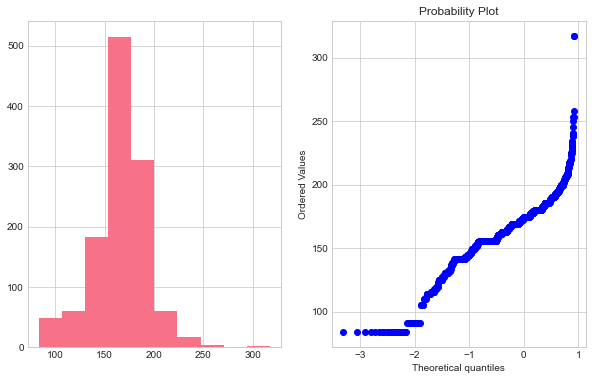

LotArea


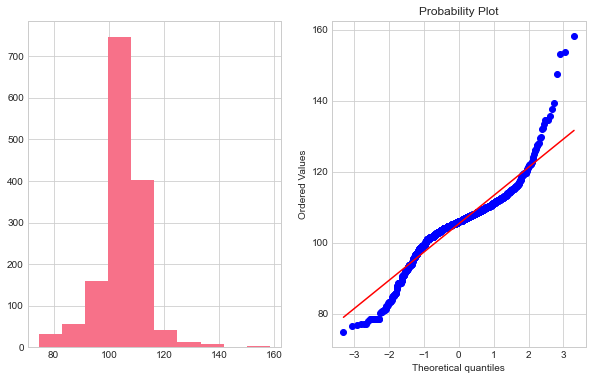

MasVnrArea


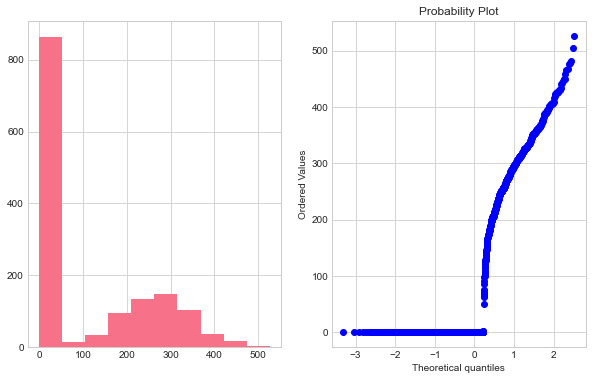

BsmtFinSF1


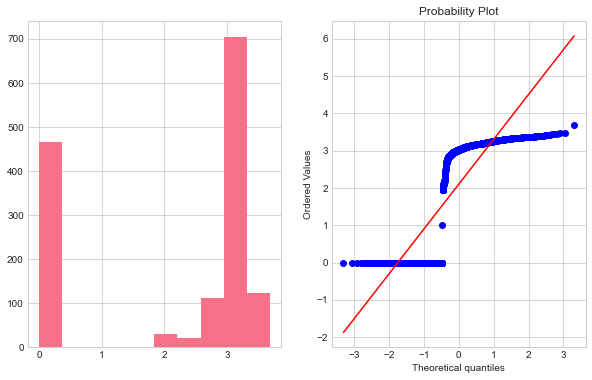

BsmtFinSF2


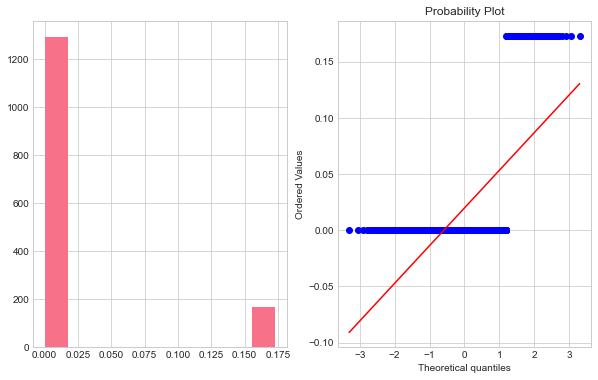

BsmtUnfSF


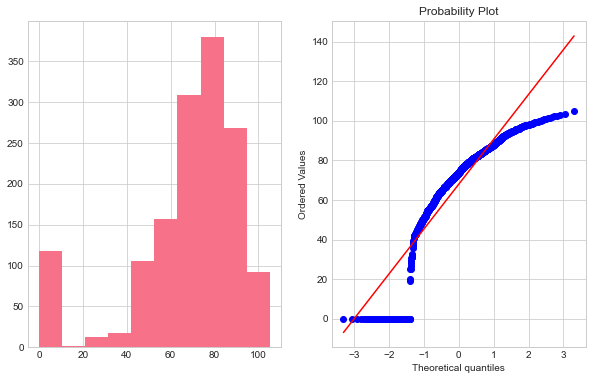

TotalBsmtSF


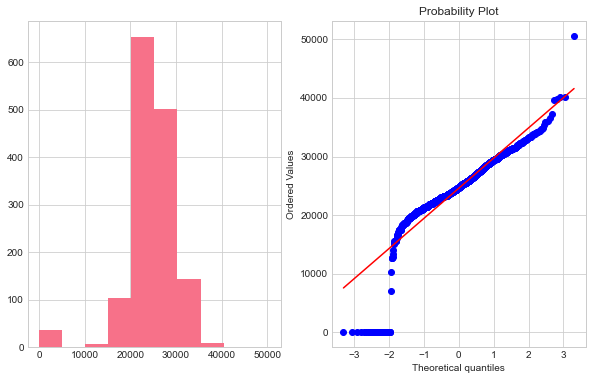

1stFlrSF


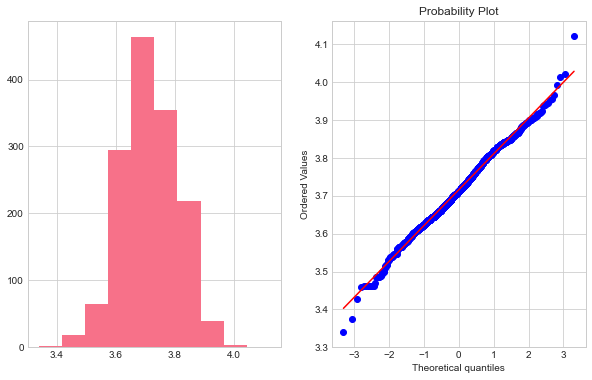

2ndFlrSF


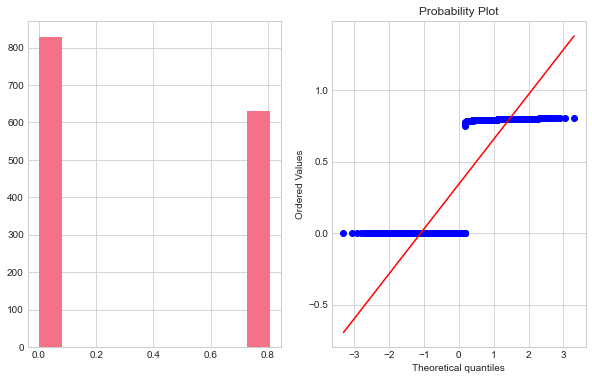

GrLivArea


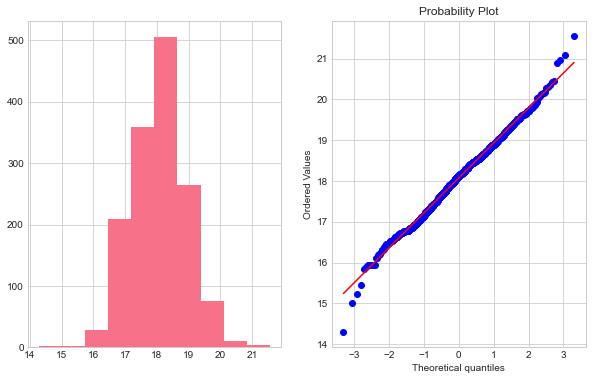

GarageArea


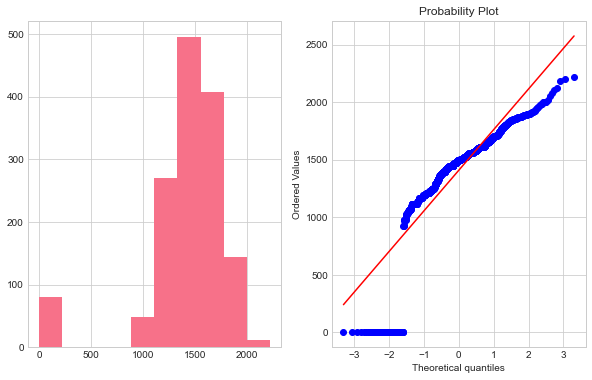

WoodDeckSF


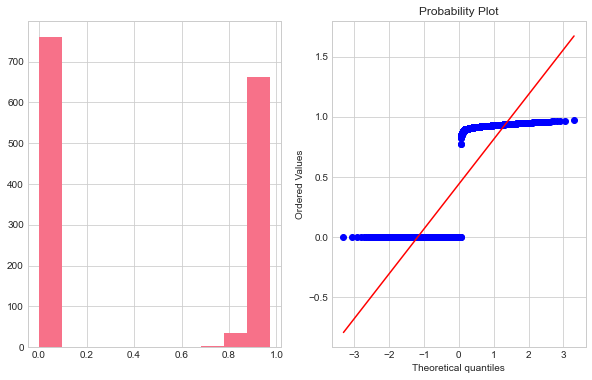

OpenPorchSF


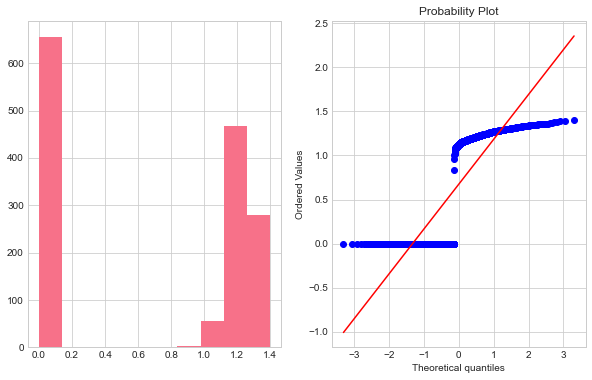

EnclosedPorch


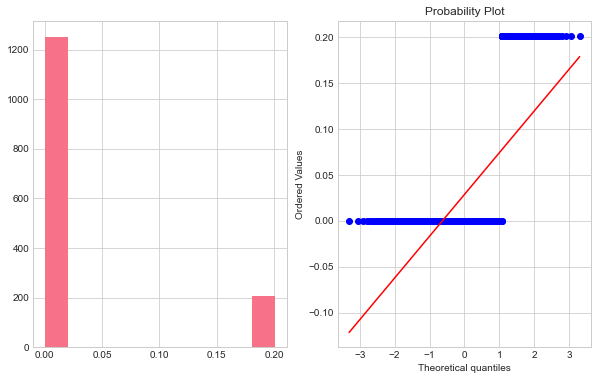

ScreenPorch


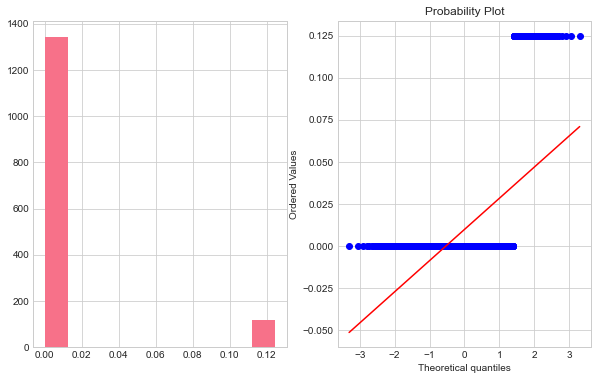

SalePrice


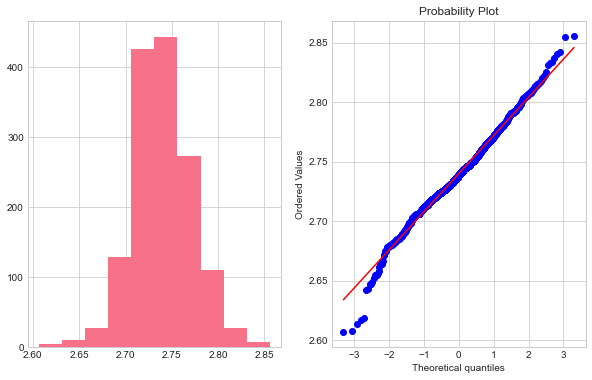

In [56]:
for feature in continous_featre:
    if feature == ['1stFlrSF', 'GrLivArea']:
        pass
    print(feature)
    df[feature] = df[feature]**(1/1.2)
    plot_data(df, feature)


    

In [ ]:
# 1stFlrSF
#Saleprice
# GrLivArea


In [26]:
for feature in continous_featre:
    print(feature)

LotFrontage
LotArea
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
GrLivArea
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
ScreenPorch
SalePrice


### We can Clearly see that some of the Features are Right Skewed, to handle them we will be using Logarithmic Transformation which will handle that

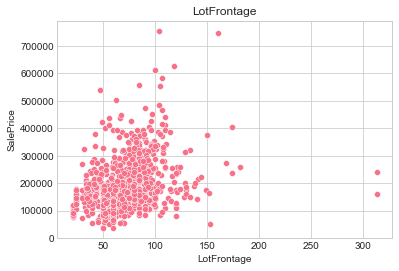

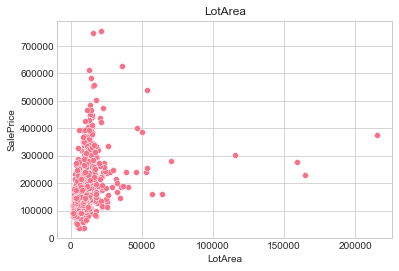

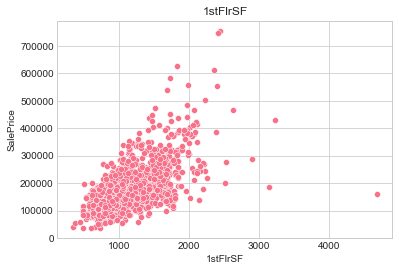

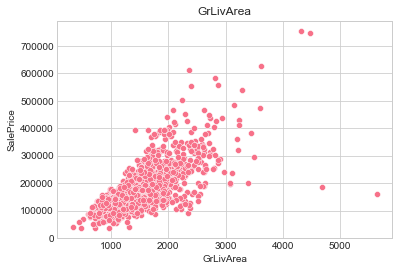

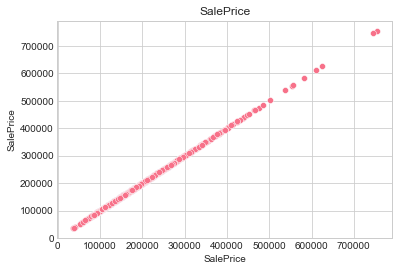

In [60]:
for feature in continous_featre:
    data=df.copy()

    # Log Transformation cannot be applies to 0 or negetive values or variables
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])

        sns.scatterplot(x=feature, y='SalePrice', data=df)
        plt.title(feature)
        plt.show()


### Checking for Outliers

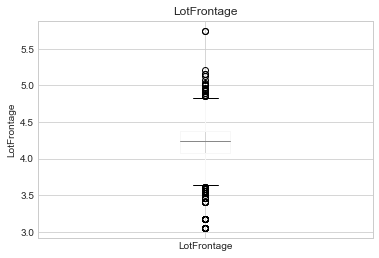

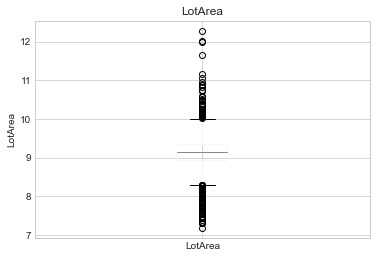

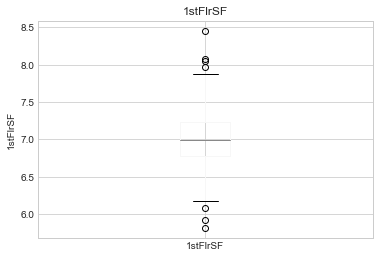

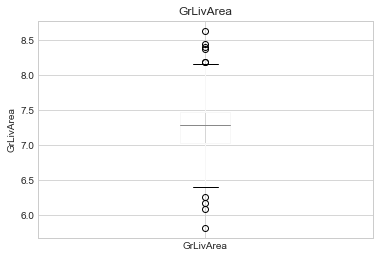

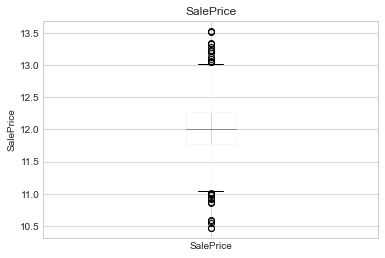

In [61]:
for feature in continous_featre:

    data=df.copy()

    # Using Log Transformation to check for Outliers
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])

        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

### There are quite a few Outliers which I will handle in the Featuring Engineering Section

## Finding the relationship between Categorical Variabale and SalePrice

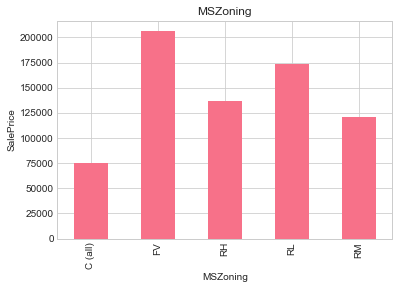

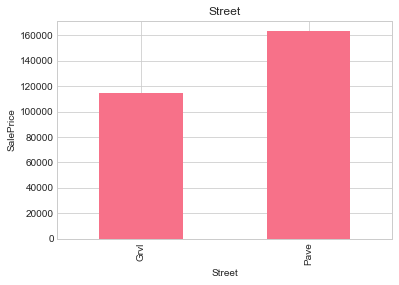

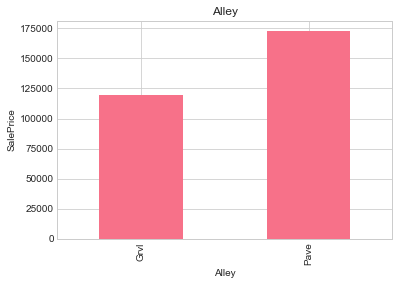

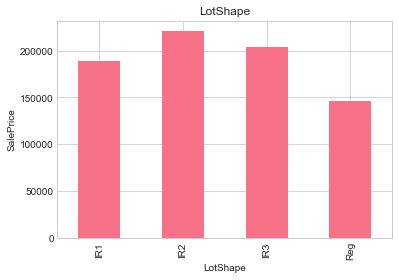

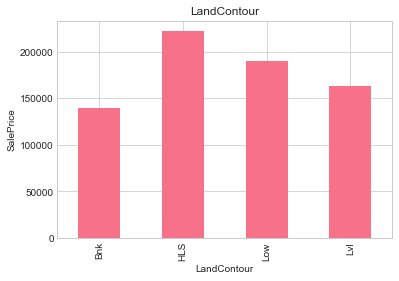

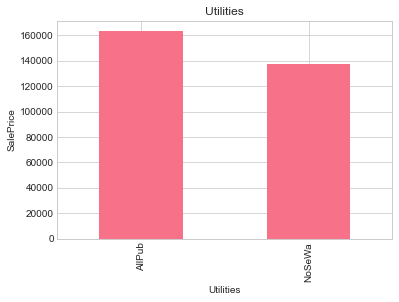

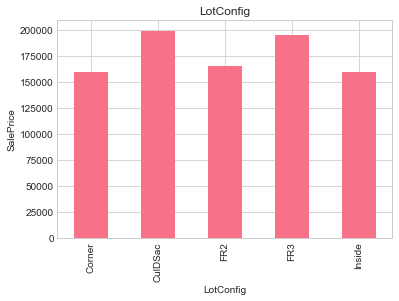

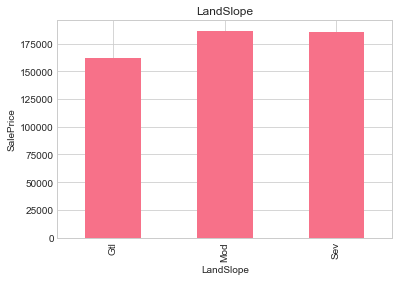

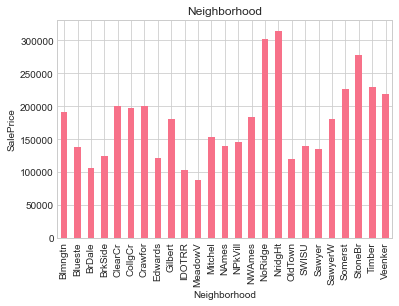

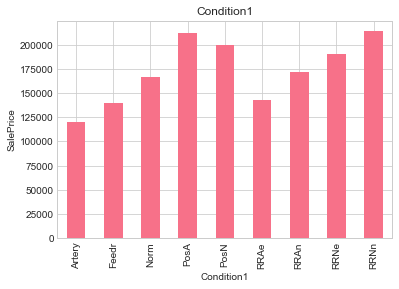

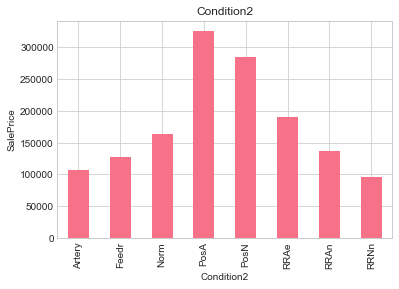

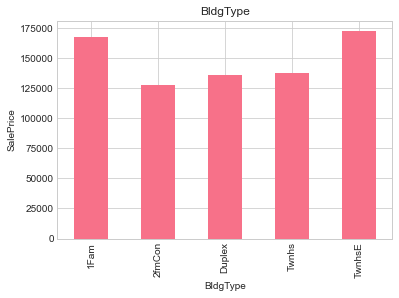

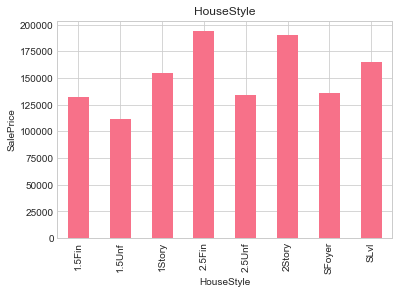

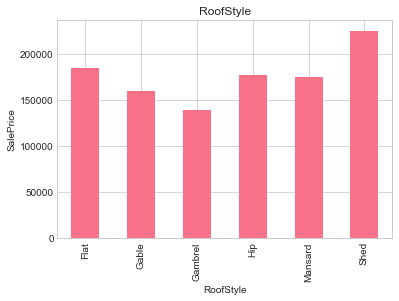

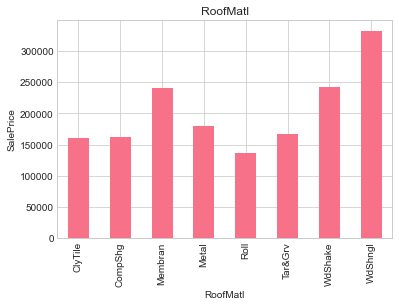

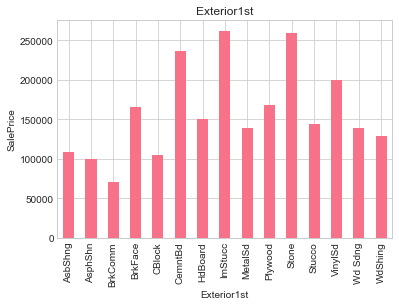

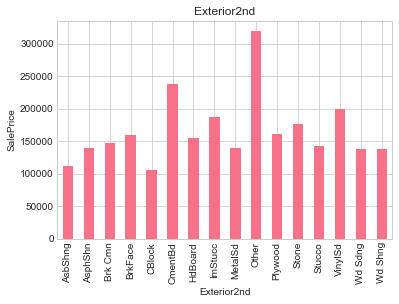

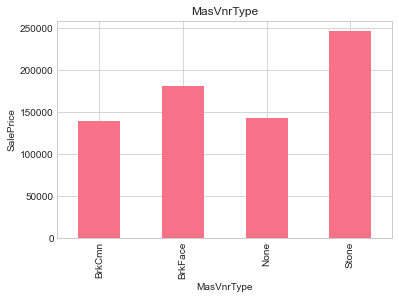

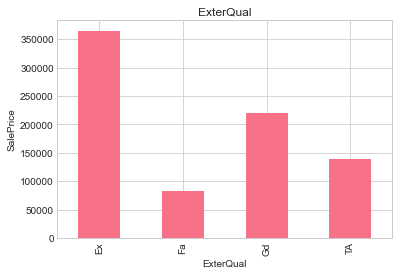

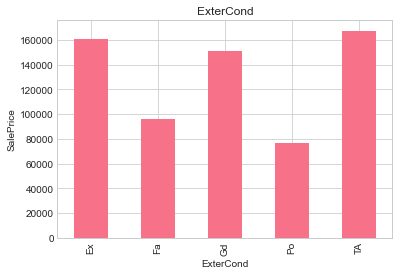

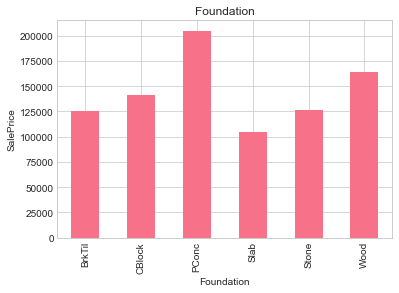

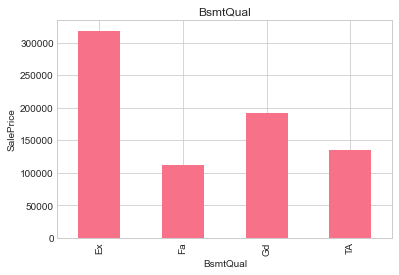

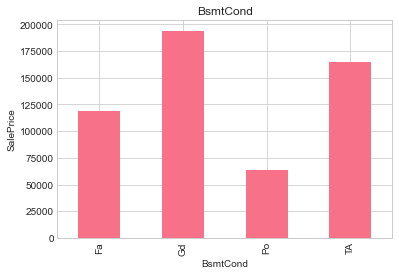

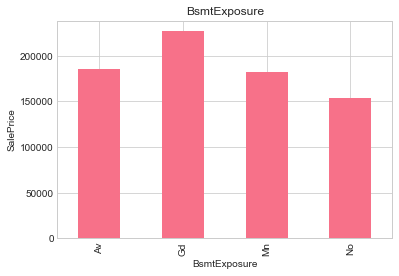

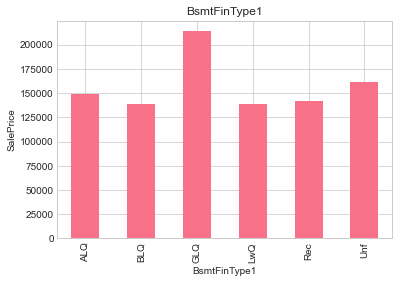

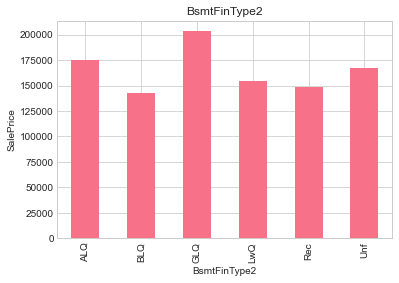

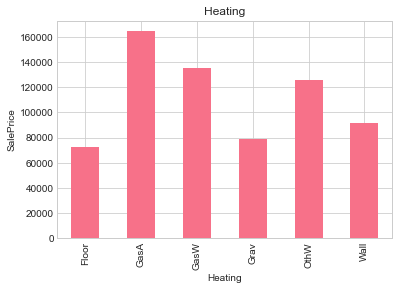

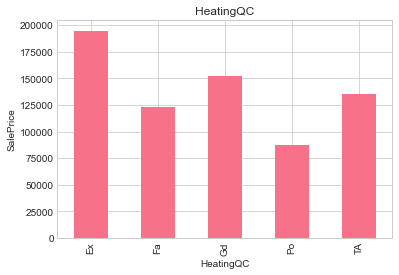

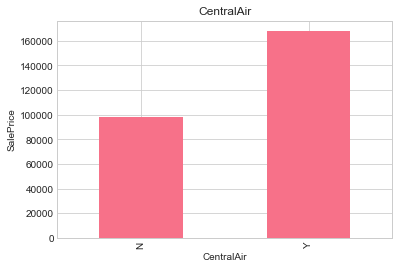

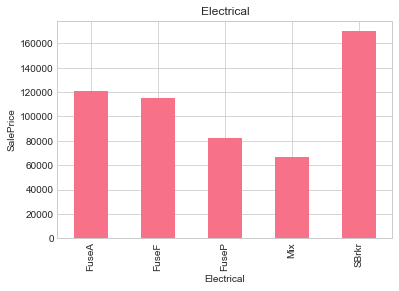

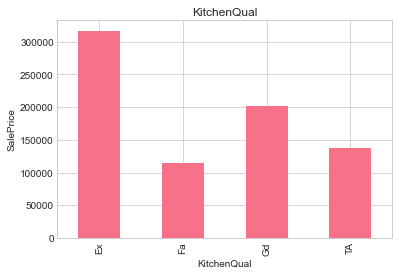

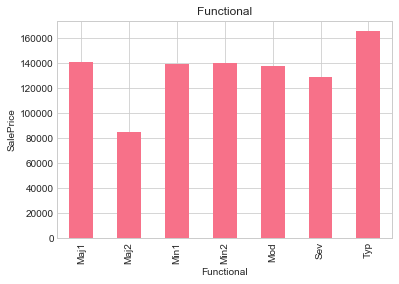

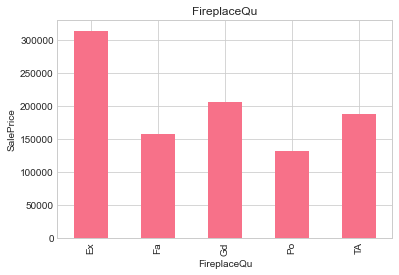

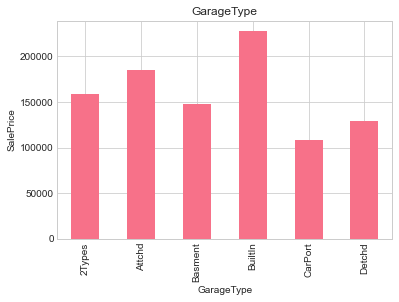

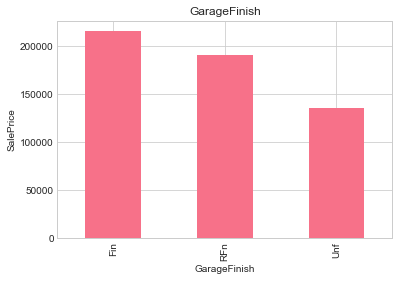

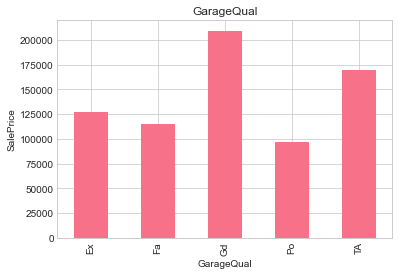

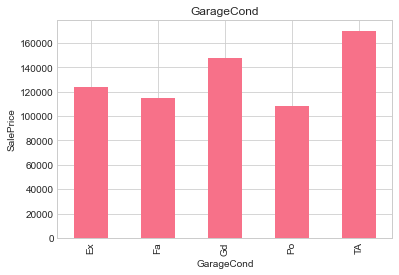

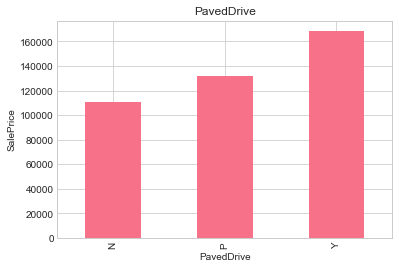

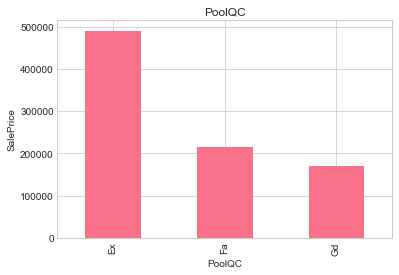

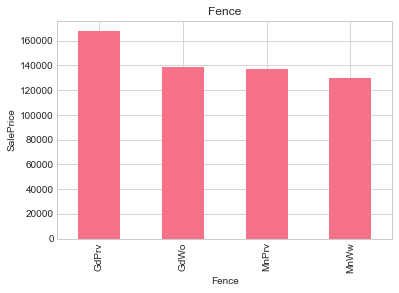

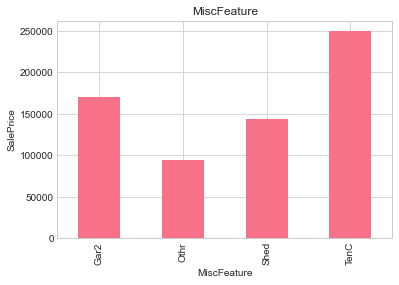

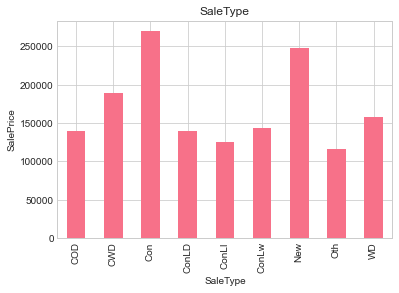

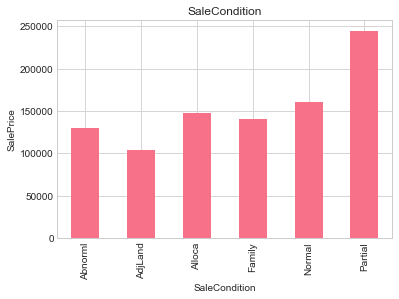

In [62]:
for feature in categorical_feature:

    data=df.copy()

    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

## **Featuring Engineering**

### We won't be splitting the DataSet as we have already been given Seperate Test and Train DataSet

### Numerical Pipeline


In [63]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# You can use any Scaling Method MinMax or Standard Scaler
num_pipeline= Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


### Categorical Pipeline

In [64]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline= Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('cat_encoder', OneHotEncoder(sparse=False))
])

### Combining Numerical and Categorical Pipeline

In [65]:
from sklearn.compose import ColumnTransformer



data=df.drop(labels=['SalePrice'],axis=1)


num_attribute=[feature for feature in data.columns if df[feature].dtypes!='O']

cat_attribute = [feature for feature in df.columns if df[feature].dtypes == 'O']


final_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribute),
    ('cat', cat_pipeline, cat_attribute)
])


## Feature Selection


In [66]:
X_train = final_pipeline.fit_transform(df[num_attribute+cat_attribute])
y = original_data['SalePrice']

## Random Forest


In [69]:


reg = RandomForestRegressor(max_depth=19, random_state=0)
reg.fit(X_train, y)
reg.score(X_train, y)


0.9804565768451579

In [70]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(reg,X_train,y,cv=10)
print(cv_scores)
print()
print("Accuracy of Your Model is :- \n ",cv_scores.mean())

[0.85939483 0.89062244 0.92177974 0.79007748 0.87982849 0.87863871
 0.88442204 0.88615851 0.76728779 0.86030527]

Accuracy of Your Model is :- 
  0.8618515311866638


## Please let me know in the comments section if any mistakes I made <br /> If you like my work please give it a UpVote <br /> Happy Coding :D